# GLOBAL UNEMPLOYMENT(2014-2024)

This projects targets to look into the global unemployment dataset (2014-2024) and uncover insights around:

* Historical trends(2014-2024)
* Demographic disparities
* Regional Comparison
* Future trends




## DATA PREPARATION

In [2]:
%load_ext sql

In [3]:
import sqlite3
import pandas as pd
import csv

In [4]:
# Load the AppleStore.csv dataset into a pandas DataFrame
df=pd.read_csv('/content/global_unemployment_data..csv', sep=',', low_memory=False)
# Print the number of rows and columns in the DataFrame
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The dataset has 1134 rows and 16 columns


In [10]:
# Load the dataframe into the SQLite database
df.to_sql('unemployment_data', conn, if_exists='replace', index=False)

1134

In [5]:
# Creating a SQLite DB file and connecting to it
conn = sqlite3.connect("unemployment_data")

In [6]:
# Load the SQL extension and connect to the SQLite database
%sql sqlite:///unemployment_data

### Overview

In [1]:
!pip install --upgrade prettytable==3.10.0

In [11]:
# Checking for the tables in the database
%%sql
SELECT
    name
FROM
    sqlite_master
WHERE
    type='table';

 * sqlite:///unemployment_data
Done.


name
unemployment_data


In [12]:
%%sql
SELECT
    *
FROM
    unemployment_data
LIMIT 5;

 * sqlite:///unemployment_data
Done.


country_name,sex,age_group,age_categories,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Regions
Afghanistan,Female,15-24,Youth,13.34,15.974,18.57,21.137,20.649,20.154,21.228,21.64,30.561,32.2,33.332,Asia
Afghanistan,Female,25+,Adults,8.576,9.014,9.463,9.92,11.223,12.587,14.079,14.415,23.818,26.192,28.298,Asia
Afghanistan,Female,Under 15,Children,10.306,11.552,12.789,14.017,14.706,15.418,16.783,17.134,26.746,29.193,30.956,Asia
Afghanistan,Male,15-24,Youth,9.206,11.502,13.772,16.027,15.199,14.361,14.452,15.099,16.655,18.512,19.77,Asia
Afghanistan,Male,25+,Adults,6.463,6.879,7.301,7.728,7.833,7.961,8.732,9.199,11.357,12.327,13.087,Asia


### Checking for missing values

In [82]:
%%sql
SELECT
    country_name,
    sex,
    age_group,
    age_categories,
    regions,
    "2014" IS NULL AS '2014', "2015" IS NULL AS '2015', "2016" IS NULL AS '2016',
    "2017" IS NULL AS '2017', "2018" IS NULL AS '2018', "2019" IS NULL AS '2019',
    "2020" IS NULL AS '2020', "2021" IS NULL AS '2021', "2022" IS NULL AS '2022',
    "2023" IS NULL AS '2023', "2024" IS NULL AS '2024'
FROM
    unemployment_data
WHERE
    "2014" IS NULL OR "2015" IS NULL OR "2016" IS NULL OR "2017" IS NULL OR
    "2018" IS NULL OR "2019" IS NULL OR "2020" IS NULL OR "2021" IS NULL OR
    "2022" IS NULL OR "2023" IS NULL OR "2024" IS NULL;

 * sqlite:///unemployment_data
Done.


country_name,sex,age_group,age_categories,Regions,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Palestinian Territories,Female,15-24,Youth,Asia,0,0,0,0,0,0,0,0,0,1,1
Palestinian Territories,Female,25+,Adults,Asia,0,0,0,0,0,0,0,0,0,1,1
Palestinian Territories,Female,Under 15,Children,Asia,0,0,0,0,0,0,0,0,0,1,1
Palestinian Territories,Male,15-24,Youth,Asia,0,0,0,0,0,0,0,0,0,1,1
Palestinian Territories,Male,25+,Adults,Asia,0,0,0,0,0,0,0,0,0,1,1
Palestinian Territories,Male,Under 15,Children,Asia,0,0,0,0,0,0,0,0,0,1,1
Ukraine,Female,15-24,Youth,Europe,0,0,0,0,0,0,0,0,1,1,1
Ukraine,Female,25+,Adults,Europe,0,0,0,0,0,0,0,0,1,1,1
Ukraine,Female,Under 15,Children,Europe,0,0,0,0,0,0,0,0,1,1,1
Ukraine,Male,15-24,Youth,Europe,0,0,0,0,0,0,0,0,1,1,1


#### Calculating medians for Palestinian territories and Ukraine

In [79]:
%%sql
-- Calculate the median rate for Palestinian Territories and Ukraine from 2014 to 2022
WITH CountryRates AS (
    SELECT country_name, "2014" AS rate FROM unemployment_data WHERE country_name IN ('Palestinian Territories', 'Ukraine') AND "2014" IS NOT NULL
    UNION ALL SELECT country_name, "2015" FROM unemployment_data WHERE country_name IN ('Palestinian Territories', 'Ukraine') AND "2015" IS NOT NULL
    UNION ALL SELECT country_name, "2016" FROM unemployment_data WHERE country_name IN ('Palestinian Territories', 'Ukraine') AND "2016" IS NOT NULL
    UNION ALL SELECT country_name, "2017" FROM unemployment_data WHERE country_name IN ('Palestinian Territories', 'Ukraine') AND "2017" IS NOT NULL
    UNION ALL SELECT country_name, "2018" FROM unemployment_data WHERE country_name IN ('Palestinian Territories', 'Ukraine') AND "2018" IS NOT NULL
    UNION ALL SELECT country_name, "2019" FROM unemployment_data WHERE country_name IN ('Palestinian Territories', 'Ukraine') AND "2019" IS NOT NULL
    UNION ALL SELECT country_name, "2020" FROM unemployment_data WHERE country_name IN ('Palestinian Territories', 'Ukraine') AND "2020" IS NOT NULL
    UNION ALL SELECT country_name, "2021" FROM unemployment_data WHERE country_name IN ('Palestinian Territories', 'Ukraine') AND "2021" IS NOT NULL
    UNION ALL SELECT country_name, "2022" FROM unemployment_data WHERE country_name IN ('Palestinian Territories', 'Ukraine') AND "2022" IS NOT NULL
),
RankedRates AS (
    SELECT
        country_name,
        rate,
        ROW_NUMBER() OVER (PARTITION BY country_name ORDER BY rate) as rn,
        COUNT(*) OVER (PARTITION BY country_name) as cnt
    FROM CountryRates
)
SELECT country_name, ROUND(AVG(rate),2) AS median_rate
FROM RankedRates
WHERE rn BETWEEN (cnt + 1) / 2 AND (cnt + 2) / 2
GROUP BY country_name;

 * sqlite:///unemployment_data
Done.


country_name,median_rate
Palestinian Territories,33.91
Ukraine,9.73


####  Replacing nulls with calculated median

In [84]:
%%sql
-- Update null values for Palestinian Territories with the calculated median (33.91)
UPDATE unemployment_data
SET
    "2023" = 33.91,
    "2024" = 33.91
WHERE country_name = 'Palestinian Territories' AND ("2023" IS NULL OR "2024" IS NULL);

 * sqlite:///unemployment_data
6 rows affected.


[]

In [90]:
%%sql
-- Update null values for Ukraine with the calculated median (9.73)
UPDATE unemployment_data
SET
    "2022" = 9.73,
    "2023" = 9.73,
    "2024" = 9.73
WHERE country_name = 'Ukraine' AND ("2022" IS NULL OR "2023" IS NULL OR "2024" IS NULL);

 * sqlite:///unemployment_data
6 rows affected.


[]

In [91]:
%%sql
-- Check for null values after updating
SELECT
    country_name,
    sex,
    age_group,
    age_categories,
    regions,
    "2014" IS NULL AS '2014', "2015" IS NULL AS '2015', "2016" IS NULL AS '2016',
    "2017" IS NULL AS '2017', "2018" IS NULL AS '2018', "2019" IS NULL AS '2019',
    "2020" IS NULL AS '2020', "2021" IS NULL AS '2021', "2022" IS NULL AS '2022',
    "2023" IS NULL AS '2023', "2024" IS NULL AS '2024'
FROM
    unemployment_data
WHERE
    "2014" IS NULL OR "2015" IS NULL OR "2016" IS NULL OR "2017" IS NULL OR
    "2018" IS NULL OR "2019" IS NULL OR "2020" IS NULL OR "2021" IS NULL OR
    "2022" IS NULL OR "2023" IS NULL OR "2024" IS NULL;

 * sqlite:///unemployment_data
Done.


country_name,sex,age_group,age_categories,Regions,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024


### Normalizing  years for a time-series analysis

In [92]:
%%sql
DROP VIEW IF EXISTS unpivoted_data;
CREATE VIEW unpivoted_data AS
SELECT
    country_name,
    sex,
    age_group,
    age_categories,
    regions,
    '2014' AS year, "2014" AS rate FROM unemployment_data
UNION ALL SELECT
    country_name, sex, age_group, age_categories, regions, '2015', "2015" FROM unemployment_data
UNION ALL SELECT
    country_name, sex, age_group, age_categories, regions, '2016', "2016" FROM unemployment_data
UNION ALL SELECT
    country_name, sex, age_group, age_categories, regions, '2017', "2017" FROM unemployment_data
UNION ALL SELECT
    country_name, sex, age_group, age_categories, regions, '2018', "2018" FROM unemployment_data
UNION ALL SELECT
    country_name, sex, age_group, age_categories, regions, '2019', "2019" FROM unemployment_data
UNION ALL SELECT
    country_name, sex, age_group, age_categories, regions, '2020', "2020" FROM unemployment_data
UNION ALL SELECT
    country_name, sex, age_group, age_categories, regions, '2021', "2021" FROM unemployment_data
UNION ALL SELECT
    country_name, sex, age_group, age_categories, regions, '2022', "2022" FROM unemployment_data
UNION ALL SELECT
    country_name, sex, age_group, age_categories, regions, '2023', "2023" FROM unemployment_data
UNION ALL SELECT
    country_name, sex, age_group, age_categories, regions, '2024', "2024" FROM unemployment_data;

 * sqlite:///unemployment_data
Done.
Done.


[]

## Historical Trends

### Average global unemployment rate per year

In [93]:
%%sql
SELECT
    year,
    ROUND(AVG(rate),2) AS avg_global_rate  --spike in 2020
FROM
    unpivoted_data
GROUP BY
    year
ORDER BY
    year;

 * sqlite:///unemployment_data
Done.


year,avg_global_rate
2014,11.39
2015,11.27
2016,11.12
2017,10.86
2018,10.52
2019,10.31
2020,11.85
2021,11.42
2022,10.34
2023,10.11


#### Visualization of Average Global Unemployment Rate Per Year

 * sqlite:///unemployment_data
Done.


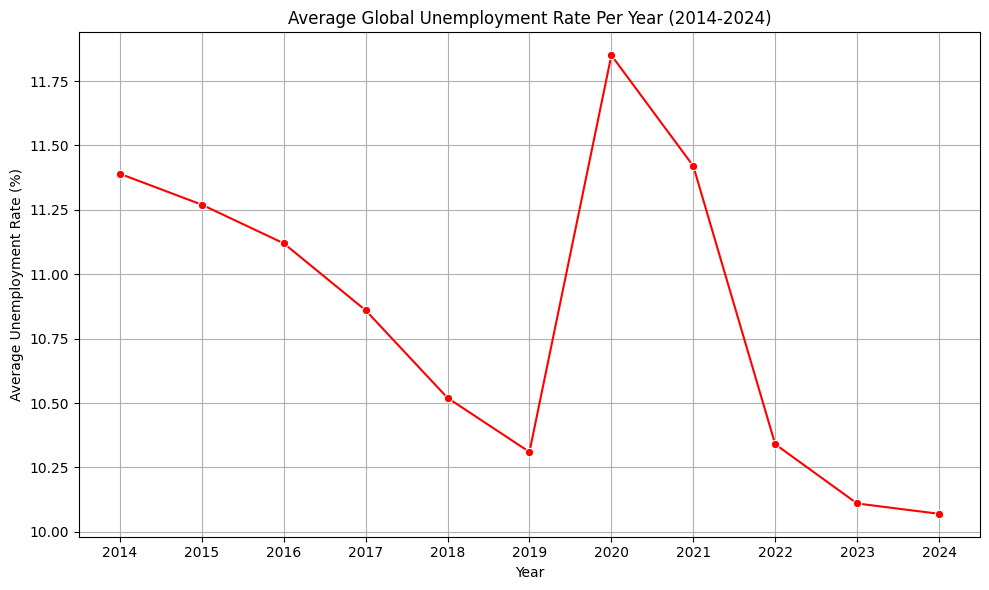

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Fetch the data from the SQL query
avg_global_rate_data = %sql SELECT year, ROUND(AVG(rate),2) AS avg_global_rate FROM unpivoted_data GROUP BY year ORDER BY year;

# Convert the SQL result to a pandas DataFrame
avg_global_rate_df = pd.DataFrame(avg_global_rate_data, columns=['year', 'avg_global_rate'])

# Convert 'year' to numeric for plotting
avg_global_rate_df['year'] = avg_global_rate_df['year'].str.replace('y', '').astype(int)

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_global_rate_df, x='year', y='avg_global_rate',color='red', marker='o')
plt.title('Average Global Unemployment Rate Per Year (2014-2024)')
plt.xlabel('Year')
plt.ylabel('Average Unemployment Rate (%)')
plt.grid(True)
plt.xticks(avg_global_rate_df['year'])


plt.tight_layout()
plt.show()

### Year-over-year change

In [94]:
%%sql
WITH
    yearly_avg AS (
    SELECT
            year,
            ROUND(AVG(rate),2) AS avg_rate  --recovery from 2020-2024
    FROM
        unpivoted_data
    GROUP BY
        year
)
SELECT
    a.year,
    a.avg_rate,
    ROUND((a.avg_rate - b.avg_rate),2) AS yoy_change
FROM
    yearly_avg a
LEFT JOIN
    yearly_avg b
    ON
    CAST(SUBSTR(a.year, 2) AS INTEGER) = CAST(SUBSTR(b.year, 2) AS INTEGER) + 1;

 * sqlite:///unemployment_data
Done.


year,avg_rate,yoy_change
2014,11.39,None
2015,11.27,-0.12
2016,11.12,-0.15
2017,10.86,-0.26
2018,10.52,-0.34
2019,10.31,-0.21
2020,11.85,1.54
2021,11.42,-0.43
2022,10.34,-1.08
2023,10.11,-0.23


## Demographic Disparities

### Overall Average Unemployment Rate by Gender (2014-2024)

In [122]:
%%sql
SELECT
    sex,
    ROUND(AVG(rate),2) AS avg_rate
FROM
    unpivoted_data

GROUP BY
    sex;

 * sqlite:///unemployment_data
Done.


sex,avg_rate
Female,12.04
Male,9.64


#### Visualization of Overall Average Unemployment Rate by Gender (2014-2024)

 * sqlite:///unemployment_data
Done.


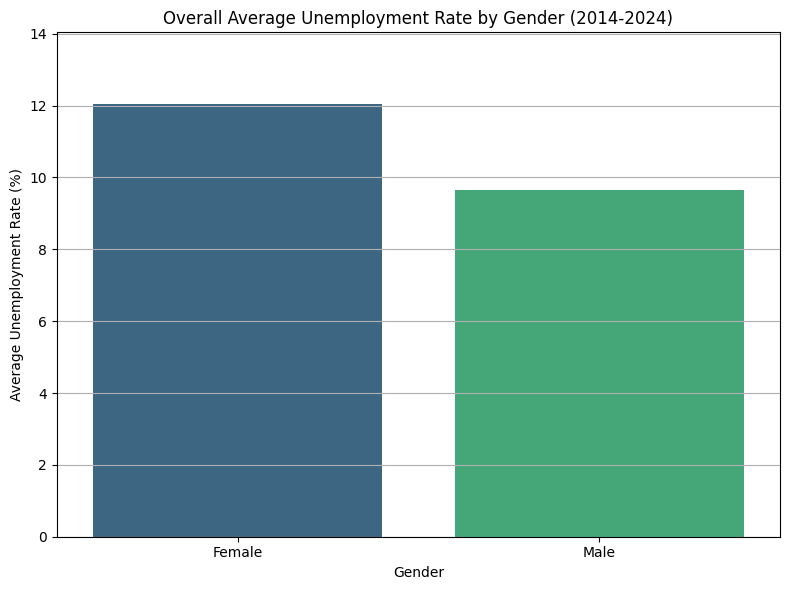

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Fetch the data from the SQL query
gender_avg_rate_data = %sql SELECT sex, ROUND(AVG(rate),2) AS avg_rate FROM unpivoted_data GROUP BY sex;

# Convert the SQL result to a pandas DataFrame
gender_avg_rate_df = pd.DataFrame(gender_avg_rate_data, columns=['sex', 'avg_rate'])

# Create a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(data=gender_avg_rate_df, x='sex', y='avg_rate', hue='sex', palette='viridis', legend=False)
plt.title('Overall Average Unemployment Rate by Gender (2014-2024)')
plt.xlabel('Gender')
plt.ylabel('Average Unemployment Rate (%)')
plt.grid(axis='y')
plt.ylim(0, gender_avg_rate_df['avg_rate'].max() + 2) # Adjust y-axis limit
plt.tight_layout()
plt.show()

### Gender gap per year

In [95]:
%%sql
SELECT
    year,
    ROUND(AVG(CASE WHEN sex = 'Female' THEN rate END) - AVG(CASE WHEN sex = 'Male' THEN rate END),2) AS gender_gap
FROM
    unpivoted_data

GROUP BY
    year;

 * sqlite:///unemployment_data
Done.


year,gender_gap
2014,2.24
2015,2.28
2016,2.34
2017,2.47
2018,2.38
2019,2.45
2020,2.61
2021,2.57
2022,2.51
2023,2.28


### Top 10 countries with widest gender gaps in 2024

In [96]:
%%sql
-- top 10 Unemployment gender gaps in 2024
SELECT
    country_name,
    ROUND((AVG(CASE WHEN sex = 'Female' THEN "2024" END) - AVG(CASE WHEN sex = 'Male' THEN "2024" END)),2) AS gap_2024
FROM
    unemployment_data
GROUP BY
    country_name
ORDER BY
    gap_2024 DESC
LIMIT 10;

 * sqlite:///unemployment_data
Done.


country_name,gap_2024
Iraq,22.81
Sudan,17.73
Syrian Arab Republic,16.96
Libya,15.4
Afghanistan,14.81
Saudi Arabia,14.43
Egypt,14.23
Algeria,13.91
Sao Tome and Principe,13.9
Gabon,13.75


### Age Group Analysis

### Average rates by age category

In [97]:
%%sql
-- average unemployment rates post pandemic
SELECT
    age_categories,
    ROUND(AVG(rate),2) AS avg_rate
FROM
    unpivoted_data
WHERE
    year >='2022'
GROUP BY
    age_categories;

 * sqlite:///unemployment_data
Done.


age_categories,avg_rate
Adults,6.1
Children,7.56
Youth,16.85


### Countries with highest youth unemployment in 2024

In [98]:
%%sql
-- youth(15-24 yrs) unemployment in 2024
SELECT
    country_name,
    ROUND(AVG("2024"),2) AS youth_unemployment_rate_2024
FROM
    unemployment_data
WHERE
    age_group = '15-24'
GROUP BY
    country_name
ORDER BY
    youth_unemployment_rate_2024 DESC
LIMIT 10;

 * sqlite:///unemployment_data
Done.


country_name,youth_unemployment_rate_2024
Djibouti,77.29
Libya,53.21
South Africa,51.31
Eswatini,46.95
Iraq,45.86
Jordan,45.0
Botswana,43.89
Sudan,41.49
Saint Vincent and the Grenadines,41.0
Syrian Arab Republic,40.89


### Children unemployment trends

In [99]:
%%sql
SELECT
     year,
    regions,
    ROUND(AVG(rate),2) AS child_unemployment_rate -- ethical concerns on developing regions
FROM
    unpivoted_data
WHERE
    age_categories = 'Children'
    AND
    year >= '2020'
GROUP BY
    regions, year
ORDER BY year;


 * sqlite:///unemployment_data
Done.


year,Regions,child_unemployment_rate
2020,Africa,10.3
2020,Americas,10.33
2020,Asia,7.67
2020,Europe,7.36
2020,Oceania,6.46
2021,Africa,10.42
2021,Americas,9.3
2021,Asia,7.51
2021,Europe,7.21
2021,Oceania,6.17


## Regional Comparisons

### Average rates by region per year

In [100]:
%%sql
--2019–2024 shifts
SELECT
    year,
    regions,
    ROUND(AVG(rate),2) AS avg_rate
FROM
    unpivoted_data
WHERE
    year >= '2019'
GROUP BY
    regions, year
ORDER BY
     year;

 * sqlite:///unemployment_data
Done.


year,Regions,avg_rate
2019,Africa,11.92
2019,Americas,10.92
2019,Asia,9.34
2019,Europe,9.44
2019,Oceania,8.37
2020,Africa,13.02
2020,Americas,14.01
2020,Asia,10.53
2020,Europe,10.78
2020,Oceania,9.58


### Region comparison by recovery rate (2024 vs. 2020)

In [101]:
%%sql
SELECT
    regions,
    ROUND((AVG("2024") - AVG("2020")),2) AS recovery_rate --Negative = better recovery
FROM
    unemployment_data
GROUP BY
    regions
ORDER BY
    recovery_rate ASC;

 * sqlite:///unemployment_data
Done.


Regions,recovery_rate
Americas,-3.89
Europe,-1.97
Oceania,-1.3
Asia,-1.08
Africa,-1.07


#### Visualization of Year-over-Year Change in Average Global Unemployment Rate

 * sqlite:///unemployment_data
Done.


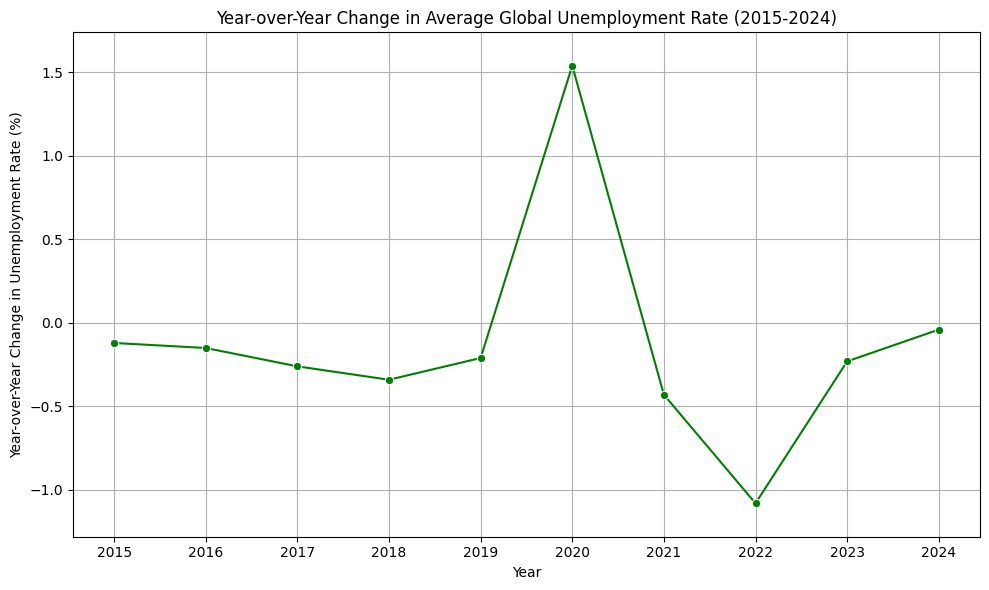

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Fetch the data from the SQL query for year-over-year change
yoy_change_data = %sql WITH yearly_avg AS ( SELECT year, ROUND(AVG(rate),2) AS avg_rate FROM unpivoted_data GROUP BY year ) SELECT a.year, a.avg_rate, ROUND((a.avg_rate - b.avg_rate),2) AS yoy_change FROM yearly_avg a LEFT JOIN yearly_avg b ON CAST(SUBSTR(a.year, 2) AS INTEGER) = CAST(SUBSTR(b.year, 2) AS INTEGER) + 1;

# Convert the SQL result to a pandas DataFrame
yoy_change_df = pd.DataFrame(yoy_change_data, columns=['year', 'avg_rate', 'yoy_change'])

# Remove the first row which has a null yoy_change
yoy_change_df = yoy_change_df.dropna(subset=['yoy_change']).copy()

# Convert 'year' to numeric for plotting
yoy_change_df['year'] = yoy_change_df['year'].str.replace('y', '').astype(int)

# Create the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=yoy_change_df, x='year', y='yoy_change', marker='o', color='green') # Changed color to red
plt.title('Year-over-Year Change in Average Global Unemployment Rate (2015-2024)')
plt.xlabel('Year')
plt.ylabel('Year-over-Year Change in Unemployment Rate (%)')
plt.grid(True)
plt.xticks(yoy_change_df['year'])

# Adjust y-axis limits to ensure all points are visible
plt.ylim(yoy_change_df['yoy_change'].min() - 0.2, yoy_change_df['yoy_change'].max() + 0.2)


plt.tight_layout()
plt.show()

#### Visualization of Regional Unemployment Trends (2019-2024)

 * sqlite:///unemployment_data
Done.


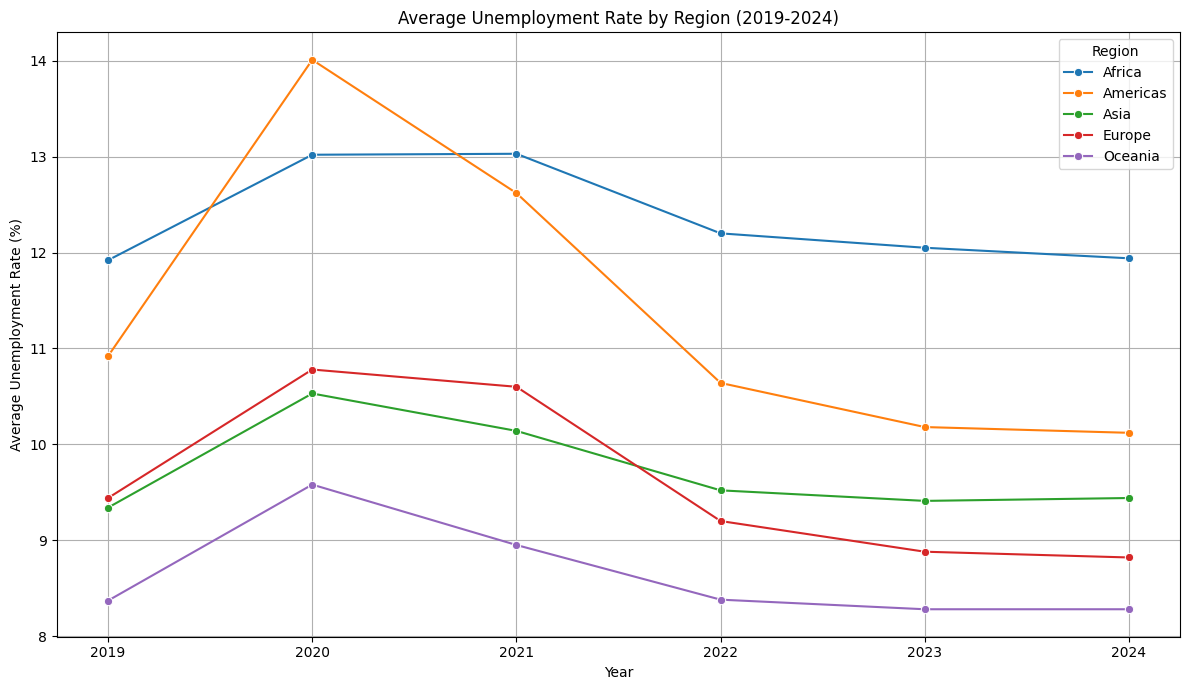

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Fetch the data from the SQL query for regional trends (2019-2024)
regional_trends_data = %sql SELECT year, regions, ROUND(AVG(rate),2) AS avg_rate FROM unpivoted_data WHERE year >= '2019' GROUP BY regions, year ORDER BY year;

# Convert the SQL result to a pandas DataFrame
regional_trends_df = pd.DataFrame(regional_trends_data, columns=['year', 'regions', 'avg_rate'])

# Convert 'year' to numeric for plotting
regional_trends_df['year'] = regional_trends_df['year'].str.replace('y', '').astype(int)

# Create the line plot with different lines for each region
plt.figure(figsize=(12, 7))
sns.lineplot(data=regional_trends_df, x='year', y='avg_rate', hue='regions', marker='o')
plt.title('Average Unemployment Rate by Region (2019-2024)')
plt.xlabel('Year')
plt.ylabel('Average Unemployment Rate (%)')
plt.grid(True)
plt.xticks(regional_trends_df['year'].unique())
plt.legend(title='Region')
plt.tight_layout()
plt.show()

### Comparison by Country

### Top 5 countries with highest overall rates in 2024

In [102]:
%%sql
SELECT
    country_name,
    ROUND(AVG("2024"),2) AS avg_unemployment_rate_2024
FROM
    unemployment_data
GROUP BY
    country_name
ORDER BY
    avg_unemployment_rate_2024 DESC LIMIT 5;

 * sqlite:///unemployment_data
Done.


country_name,avg_unemployment_rate_2024
Djibouti,42.62
South Africa,35.26
Palestinian Territories,33.91
Libya,29.67
Botswana,29.08


### Top 5 countries with lowest overall rates in 2024

In [103]:
%%sql
SELECT
    country_name,
    ROUND(AVG(COALESCE("2024", 0)), 2) AS avg_unemployment_rate_2024
FROM
    unemployment_data
GROUP BY
    country_name
ORDER BY
    avg_unemployment_rate_2024 ASC
LIMIT 5;


 * sqlite:///unemployment_data
Done.


country_name,avg_unemployment_rate_2024
Cambodia,0.34
Qatar,0.45
Niger,0.48
Chad,0.97
Burundi,0.98


### COVID-19  impact per country

In [104]:
%%sql
SELECT
    country_name,
    ROUND(((AVG("2020") - AVG("2019")) / AVG("2019") * 100),2) || '%' AS pct_spike --pct spike due to covid-19 pandemic
FROM
    unemployment_data
GROUP BY
    country_name
ORDER BY
      pct_spike DESC
LIMIT 10;

 * sqlite:///unemployment_data
Done.


country_name,pct_spike
Peru,93.31%
"Hong Kong, China",90.25%
Central African Republic,9.97%
Lesotho,9.93%
Burkina Faso,9.82%
Mongolia,9.75%
Cameroon,9.73%
Tajikistan,9.56%
Congo,9.43%
Eritrea,9.41%


### Country comparison by recovery rate (2024 vs. 2020)

In [105]:
%%sql
SELECT
    country_name,
    ROUND((AVG("2024") - AVG("2020"))/AVG("2020"),2) AS recovery_rate -- Negative = better recovery
FROM
    unemployment_data
GROUP BY
    country_name
ORDER BY
    recovery_rate
LIMIT 10;

 * sqlite:///unemployment_data
Done.


country_name,recovery_rate
"Macau, China",-0.56
Oman,-0.51
Bolivia,-0.49
Costa Rica,-0.47
Panama,-0.47
United States,-0.47
Peru,-0.46
Brazil,-0.42
El Salvador,-0.41
Argentina,-0.4


### COVID-19  impact in East Africa

In [106]:
%%sql
SELECT
    country_name,
    ROUND(((AVG("2020") - AVG("2019")) / AVG("2019") * 100),2)||'%' AS pct_spike --pct spike due to covid-19 pandemic
FROM
    unemployment_data
WHERE
    country_name IN ('Kenya','Uganda', 'Tanzania, United Republic of')
GROUP BY
    country_name
ORDER BY
    pct_spike DESC
;

 * sqlite:///unemployment_data
Done.


country_name,pct_spike
Uganda,21.81%
"Tanzania, United Republic of",12.9%
Kenya,10.03%


### EAC comparison by recovery rate (2024 vs. 2020)

In [110]:
%%sql
SELECT
    country_name,
    ROUND((AVG("2024") - AVG("2020"))/AVG("2020")*100,2) ||'%' AS recovery_rate -- Negative = better recovery
FROM
    unemployment_data
WHERE
     country_name IN ('Kenya','Uganda', 'Tanzania, United Republic of')
GROUP BY
    country_name
ORDER BY
    recovery_rate
LIMIT 10;

 * sqlite:///unemployment_data
Done.


country_name,recovery_rate
Uganda,-25.06%
Kenya,-3.77%
"Tanzania, United Republic of",-8.89%


## Key insights

Here are three key policy recommendations based on the analysis of global unemployment trends:

1. The dramatic spike in unemployment during COVID-19 showed how vulnerable people are to unexpected global events.
2. Youth unemployment remains significantly higher than for other age groups. This means many young people are struggling to start their careers.
3. There's a persistent gender gap in the workforce with women often facing higher rates. This isn't just unfair, it's a missed opportunity for economies.
4. Countries in Asia, Africa, and Oceania seem to struggle recovering from the COVID-19 crisis.
5. There is a negative year-over-year (YoY) change indicating a decrease in global unemployment rates post Covid-19.

## Recommendations
1. Governments and international bodies should invest in robust unemployment support systems and emergency aid programs that can quickly help individuals and families when jobs disappear due to crises like pandemics or economic downturns.
2. Prioritize funding for quality education and practical training programs that give young people the skills needed for today's job market. This should be combined with initiatives that connect them with job opportunities, like internships and apprenticeships, ensuring a smoother transition from school to work.
3. Implement policies that actively support women's equal participation in the workforce. This includes tackling discrimination, providing access to affordable childcare, and promoting flexible work arrangements, making it easier for women to build successful careers and contribute fully to the economy.

## Sources
 Click here to [explore dataset](https://www.kaggle.com/datasets/sazidthe1/global-unemployment-data)